**Installation of dependencies**

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

**Cloning ultralyunics**

In [1]:
!git --version

git version 2.33.1.windows.1


In [ ]:
!git clone https://github.com/ultralytics/yolov5

**installation according to requirements.txt**

In [ ]:
!cd yolov5 & pip install -r requirements.txt --user

**Modules installation**

In [ ]:
pip install opencv-contrib-python

In [4]:

import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

**Loading the model **

In [71]:
pip install numexpr

Note: you may need to restart the kernel to use updated packages.


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\abwao/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-4 torch 1.10.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

**Making detections with images**

In [10]:
img = 'https://easyreach.co.in/wp-content/uploads/2018/08/industrial-vehicle.jpg'


In [11]:
results = model(img)
results.imgs
# model(img)

[array([[[ 47,  51,  96],
         [ 47,  51,  96],
         [ 47,  51,  96],
         ...,
         [ 47,  55, 101],
         [ 44,  52,  98],
         [ 63,  71, 117]],
 
        [[ 47,  51,  96],
         [ 47,  51,  96],
         [ 47,  51,  96],
         ...,
         [ 47,  55, 101],
         [ 44,  52,  98],
         [ 64,  72, 118]],
 
        [[ 47,  51,  96],
         [ 47,  51,  96],
         [ 47,  51,  96],
         ...,
         [ 46,  54, 100],
         [ 44,  52,  98],
         [ 64,  72, 118]],
 
        ...,
 
        [[ 79,  75,  74],
         [ 72,  68,  67],
         [ 63,  59,  58],
         ...,
         [109,  85,  59],
         [161, 137, 113],
         [135, 113,  90]],
 
        [[ 85,  81,  80],
         [ 77,  73,  72],
         [ 69,  65,  64],
         ...,
         [112,  88,  64],
         [104,  82,  59],
         [152, 130, 107]],
 
        [[ 89,  85,  82],
         [ 81,  77,  74],
         [ 73,  69,  66],
         ...,
         [127, 105,  81],
  

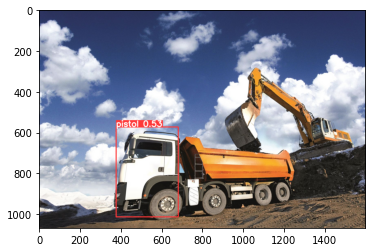

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

**Real time detection from webcam**

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Training**

In [5]:
pip install opencv-python>=4.1.2 --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-python>=4.1.2 --user


Note: you may need to restart the kernel to use updated packages.


In [28]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data datafinal.yaml --weights yolov5s.pt --workers 2 --resume


github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5

Optimizer stripped from runs\train\exp14\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp14\weights\best.pt, 14.3MB



wandb: Currently logged in as: barrito (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=datafinal.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Resuming training from .\runs\train\exp14\weights\last.pt
YOLOv5  2021-11-9 torch 1.10.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

    49/499    0.837G   0.02847   0.01278         0        51       320:  20%|#9        | 26/131 [00:45<01:46,  1.02s/it]
    49/499    0.837G   0.02847   0.01278         0        51       320:  21%|##        | 27/131 [00:45<01:22,  1.26it/s]
    49/499    0.837G   0.02819   0.01271         0        33       320:  21%|##        | 27/131 [00:47<01:22,  1.26it/s]
    49/499    0.837G   0.02819   0.01271         0        33       320:  21%|##1       | 28/131 [00:47<01:46,  1.03s/it]
    49/499    0.837G   0.02826   0.01266         0        41       320:  21%|##1       | 28/131 [00:47<01:46,  1.03s/it]
    49/499    0.837G   0.02826   0.01266         0        41       320:  22%|##2       | 29/131 [00:47<01:22,  1.23it/s]
    49/499    0.837G   0.02806   0.01259         0        37       320:  22%|##2       | 29/131 [00:48<01:22,  1.23it/s]
    49/499    0.837G   0.02806   0.01259         0        37       320:  23%|##2       | 30/131 [00:48<01:28,  1.14it/s]
    49/499    0.837G   0.02808  

    49/499    0.837G   0.02854   0.01286         0        41       320:  94%|#########3| 123/131 [01:16<00:02,  3.84it/s]
    49/499    0.837G   0.02851   0.01285         0        43       320:  94%|#########3| 123/131 [01:16<00:02,  3.84it/s]
    49/499    0.837G   0.02851   0.01285         0        43       320:  95%|#########4| 124/131 [01:16<00:01,  3.81it/s]
    49/499    0.837G   0.02855   0.01282         0        31       320:  95%|#########4| 124/131 [01:16<00:01,  3.81it/s]
    49/499    0.837G   0.02855   0.01282         0        31       320:  95%|#########5| 125/131 [01:16<00:01,  3.66it/s]
    49/499    0.837G   0.02853   0.01283         0        38       320:  95%|#########5| 125/131 [01:16<00:01,  3.66it/s]
    49/499    0.837G   0.02853   0.01283         0        38       320:  96%|#########6| 126/131 [01:16<00:01,  3.73it/s]
    49/499    0.837G   0.02853   0.01284         0        41       320:  96%|#########6| 126/131 [01:17<00:01,  3.73it/s]
    49/499    0.837G   0

    50/499     1.02G   0.02782   0.01246         0        45       320:  31%|###1      | 41/131 [00:10<00:23,  3.88it/s]
    50/499     1.02G    0.0278   0.01243         0        39       320:  31%|###1      | 41/131 [00:11<00:23,  3.88it/s]
    50/499     1.02G    0.0278   0.01243         0        39       320:  32%|###2      | 42/131 [00:11<00:23,  3.78it/s]
    50/499     1.02G   0.02775   0.01242         0        43       320:  32%|###2      | 42/131 [00:11<00:23,  3.78it/s]
    50/499     1.02G   0.02775   0.01242         0        43       320:  33%|###2      | 43/131 [00:11<00:23,  3.82it/s]
    50/499     1.02G   0.02767   0.01236         0        35       320:  33%|###2      | 43/131 [00:11<00:23,  3.82it/s]
    50/499     1.02G   0.02767   0.01236         0        35       320:  34%|###3      | 44/131 [00:11<00:22,  3.84it/s]
    50/499     1.02G   0.02767   0.01238         0        40       320:  34%|###3      | 44/131 [00:12<00:22,  3.84it/s]
    50/499     1.02G   0.02767  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 7/19 [00:02<00:03,  3.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  42%|####2     | 8/19 [00:03<00:05,  2.01it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  47%|####7     | 9/19 [00:03<00:04,  2.04it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  53%|#####2    | 10/19 [00:03<00:04,  2.24it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  58%|#####7    | 11/19 [00:04<00:03,  2.41it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  63%|######3   | 12/19 [00:04<00:02,  2.54it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  68%|######8   | 13/19 [00:04<00:02,  2.66it/s]
               Class     Images     Labels         

    55/499     1.02G   0.02797   0.01165         0        41       320:  12%|#2        | 16/131 [00:04<00:30,  3.74it/s]
    55/499     1.02G   0.02797   0.01165         0        41       320:  13%|#2        | 17/131 [00:04<00:30,  3.79it/s]
    55/499     1.02G   0.02766   0.01168         0        45       320:  13%|#2        | 17/131 [00:04<00:30,  3.79it/s]
    55/499     1.02G   0.02766   0.01168         0        45       320:  14%|#3        | 18/131 [00:04<00:29,  3.81it/s]
    55/499     1.02G   0.02766   0.01179         0        48       320:  14%|#3        | 18/131 [00:05<00:29,  3.81it/s]
    55/499     1.02G   0.02766   0.01179         0        48       320:  15%|#4        | 19/131 [00:05<00:30,  3.72it/s]
    55/499     1.02G   0.02749   0.01193         0        45       320:  15%|#4        | 19/131 [00:05<00:30,  3.72it/s]
    55/499     1.02G   0.02749   0.01193         0        45       320:  15%|#5        | 20/131 [00:05<00:30,  3.65it/s]
    55/499     1.02G   0.02742  

    56/499     1.02G   0.02686   0.01138         0        44       320:  33%|###2      | 43/131 [00:11<00:23,  3.82it/s]
    56/499     1.02G   0.02686   0.01138         0        44       320:  34%|###3      | 44/131 [00:11<00:23,  3.75it/s]
    56/499     1.02G   0.02688   0.01137         0        45       320:  34%|###3      | 44/131 [00:12<00:23,  3.75it/s]
    56/499     1.02G   0.02688   0.01137         0        45       320:  34%|###4      | 45/131 [00:12<00:22,  3.79it/s]
    56/499     1.02G   0.02683    0.0114         0        51       320:  34%|###4      | 45/131 [00:12<00:22,  3.79it/s]
    56/499     1.02G   0.02683    0.0114         0        51       320:  35%|###5      | 46/131 [00:12<00:22,  3.82it/s]
    56/499     1.02G    0.0268   0.01133         0        31       320:  35%|###5      | 46/131 [00:12<00:22,  3.82it/s]
    56/499     1.02G    0.0268   0.01133         0        31       320:  36%|###5      | 47/131 [00:12<00:21,  3.85it/s]
    56/499     1.02G   0.02686  

    57/499     1.02G   0.02658   0.01181         0        42       320:  40%|####      | 53/131 [00:14<00:21,  3.70it/s]
    57/499     1.02G   0.02658   0.01181         0        42       320:  41%|####1     | 54/131 [00:14<00:20,  3.71it/s]
    57/499     1.02G   0.02659   0.01183         0        43       320:  41%|####1     | 54/131 [00:14<00:20,  3.71it/s]
    57/499     1.02G   0.02659   0.01183         0        43       320:  42%|####1     | 55/131 [00:14<00:20,  3.71it/s]
    57/499     1.02G   0.02658    0.0118         0        36       320:  42%|####1     | 55/131 [00:14<00:20,  3.71it/s]
    57/499     1.02G   0.02658    0.0118         0        36       320:  43%|####2     | 56/131 [00:14<00:20,  3.74it/s]
    57/499     1.02G   0.02667   0.01185         0        45       320:  43%|####2     | 56/131 [00:15<00:20,  3.74it/s]
    57/499     1.02G   0.02667   0.01185         0        45       320:  44%|####3     | 57/131 [00:15<00:20,  3.65it/s]
    57/499     1.02G   0.02667  

    58/499     1.02G   0.02581   0.01174         0        45       320:  40%|####      | 53/131 [00:14<00:20,  3.74it/s]
    58/499     1.02G   0.02581   0.01174         0        45       320:  41%|####1     | 54/131 [00:14<00:20,  3.67it/s]
    58/499     1.02G   0.02576   0.01169         0        23       320:  41%|####1     | 54/131 [00:14<00:20,  3.67it/s]
    58/499     1.02G   0.02576   0.01169         0        23       320:  42%|####1     | 55/131 [00:14<00:20,  3.73it/s]
    58/499     1.02G   0.02578   0.01167         0        30       320:  42%|####1     | 55/131 [00:14<00:20,  3.73it/s]
    58/499     1.02G   0.02578   0.01167         0        30       320:  43%|####2     | 56/131 [00:14<00:19,  3.75it/s]
    58/499     1.02G   0.02577   0.01166         0        32       320:  43%|####2     | 56/131 [00:15<00:19,  3.75it/s]
    58/499     1.02G   0.02577   0.01166         0        32       320:  44%|####3     | 57/131 [00:15<00:19,  3.78it/s]
    58/499     1.02G    0.0258  

    58/499     1.02G   0.02626   0.01194         0        34       320:  73%|#######3  | 96/131 [00:25<00:09,  3.79it/s]
    58/499     1.02G   0.02626   0.01194         0        34       320:  74%|#######4  | 97/131 [00:25<00:08,  3.79it/s]
    58/499     1.02G   0.02623   0.01191         0        31       320:  74%|#######4  | 97/131 [00:26<00:08,  3.79it/s]
    58/499     1.02G   0.02623   0.01191         0        31       320:  75%|#######4  | 98/131 [00:26<00:08,  3.69it/s]
    58/499     1.02G   0.02625   0.01193         0        46       320:  75%|#######4  | 98/131 [00:26<00:08,  3.69it/s]
    58/499     1.02G   0.02625   0.01193         0        46       320:  76%|#######5  | 99/131 [00:26<00:08,  3.74it/s]
    58/499     1.02G   0.02622   0.01198         0        52       320:  76%|#######5  | 99/131 [00:26<00:08,  3.74it/s]
    58/499     1.02G   0.02622   0.01198         0        52       320:  76%|#######6  | 100/131 [00:26<00:08,  3.78it/s]
    58/499     1.02G   0.02617 

    59/499     1.02G    0.0257    0.0117         0        36       320:   8%|7         | 10/131 [00:03<00:32,  3.68it/s]
    59/499     1.02G    0.0257    0.0117         0        36       320:   8%|8         | 11/131 [00:03<00:33,  3.62it/s]
    59/499     1.02G   0.02551   0.01182         0        42       320:   8%|8         | 11/131 [00:03<00:33,  3.62it/s]
    59/499     1.02G   0.02551   0.01182         0        42       320:   9%|9         | 12/131 [00:03<00:32,  3.71it/s]
    59/499     1.02G   0.02604   0.01173         0        36       320:   9%|9         | 12/131 [00:03<00:32,  3.71it/s]
    59/499     1.02G   0.02604   0.01173         0        36       320:  10%|9         | 13/131 [00:03<00:31,  3.78it/s]
    59/499     1.02G   0.02612    0.0118         0        39       320:  10%|9         | 13/131 [00:03<00:31,  3.78it/s]
    59/499     1.02G   0.02612    0.0118         0        39       320:  11%|#         | 14/131 [00:03<00:30,  3.79it/s]
    59/499     1.02G   0.02611  

    59/499     1.02G   0.02675   0.01197         0        41       320:  67%|######7   | 88/131 [00:23<00:11,  3.74it/s]
    59/499     1.02G   0.02675   0.01197         0        41       320:  68%|######7   | 89/131 [00:23<00:11,  3.80it/s]
    59/499     1.02G   0.02674   0.01195         0        39       320:  68%|######7   | 89/131 [00:24<00:11,  3.80it/s]
    59/499     1.02G   0.02674   0.01195         0        39       320:  69%|######8   | 90/131 [00:24<00:10,  3.82it/s]
    59/499     1.02G   0.02677   0.01198         0        43       320:  69%|######8   | 90/131 [00:24<00:10,  3.82it/s]
    59/499     1.02G   0.02677   0.01198         0        43       320:  69%|######9   | 91/131 [00:24<00:10,  3.73it/s]
    59/499     1.02G   0.02674   0.01198         0        38       320:  69%|######9   | 91/131 [00:24<00:10,  3.73it/s]
    59/499     1.02G   0.02674   0.01198         0        38       320:  70%|#######   | 92/131 [00:24<00:10,  3.78it/s]
    59/499     1.02G   0.02673  

    61/499     1.02G   0.02649   0.01208         0        41       320:  59%|#####8    | 77/131 [00:20<00:14,  3.69it/s]
    61/499     1.02G    0.0265   0.01205         0        39       320:  59%|#####8    | 77/131 [00:20<00:14,  3.69it/s]
    61/499     1.02G    0.0265   0.01205         0        39       320:  60%|#####9    | 78/131 [00:20<00:14,  3.76it/s]
    61/499     1.02G   0.02644   0.01206         0        39       320:  60%|#####9    | 78/131 [00:21<00:14,  3.76it/s]
    61/499     1.02G   0.02644   0.01206         0        39       320:  60%|######    | 79/131 [00:21<00:13,  3.78it/s]
    61/499     1.02G   0.02641   0.01204         0        36       320:  60%|######    | 79/131 [00:21<00:13,  3.78it/s]
    61/499     1.02G   0.02641   0.01204         0        36       320:  61%|######1   | 80/131 [00:21<00:13,  3.81it/s]
    61/499     1.02G   0.02639   0.01207         0        51       320:  61%|######1   | 80/131 [00:21<00:13,  3.81it/s]
    61/499     1.02G   0.02639  

    67/499     1.02G   0.02545   0.01113         0        35       320:  39%|###8      | 51/131 [00:13<00:22,  3.60it/s]
    67/499     1.02G   0.02549   0.01112         0        40       320:  39%|###8      | 51/131 [00:13<00:22,  3.60it/s]
    67/499     1.02G   0.02549   0.01112         0        40       320:  40%|###9      | 52/131 [00:13<00:21,  3.67it/s]
    67/499     1.02G   0.02554   0.01117         0        45       320:  40%|###9      | 52/131 [00:14<00:21,  3.67it/s]
    67/499     1.02G   0.02554   0.01117         0        45       320:  40%|####      | 53/131 [00:14<00:20,  3.74it/s]
    67/499     1.02G   0.02553   0.01116         0        36       320:  40%|####      | 53/131 [00:14<00:20,  3.74it/s]
    67/499     1.02G   0.02553   0.01116         0        36       320:  41%|####1     | 54/131 [00:14<00:20,  3.75it/s]
    67/499     1.02G   0.02555   0.01114         0        30       320:  41%|####1     | 54/131 [00:14<00:20,  3.75it/s]
    67/499     1.02G   0.02555  

    67/499     1.02G   0.02577   0.01149         0        32       320:  77%|#######7  | 101/131 [00:27<00:07,  3.79it/s]
    67/499     1.02G   0.02579   0.01149         0        38       320:  77%|#######7  | 101/131 [00:27<00:07,  3.79it/s]
    67/499     1.02G   0.02579   0.01149         0        38       320:  78%|#######7  | 102/131 [00:27<00:07,  3.76it/s]
    67/499     1.02G   0.02579   0.01152         0        44       320:  78%|#######7  | 102/131 [00:27<00:07,  3.76it/s]
    67/499     1.02G   0.02579   0.01152         0        44       320:  79%|#######8  | 103/131 [00:27<00:07,  3.64it/s]
    67/499     1.02G   0.02577   0.01152         0        38       320:  79%|#######8  | 103/131 [00:27<00:07,  3.64it/s]
    67/499     1.02G   0.02577   0.01152         0        38       320:  79%|#######9  | 104/131 [00:27<00:07,  3.70it/s]
    67/499     1.02G   0.02575   0.01151         0        40       320:  79%|#######9  | 104/131 [00:28<00:07,  3.70it/s]
    67/499     1.02G   0

    70/499     1.02G   0.02665    0.0115         0        37       320:   9%|9         | 12/131 [00:03<00:31,  3.79it/s]
    70/499     1.02G   0.02665    0.0115         0        37       320:  10%|9         | 13/131 [00:03<00:31,  3.79it/s]
    70/499     1.02G   0.02684   0.01152         0        37       320:  10%|9         | 13/131 [00:03<00:31,  3.79it/s]
    70/499     1.02G   0.02684   0.01152         0        37       320:  11%|#         | 14/131 [00:03<00:31,  3.71it/s]
    70/499     1.02G   0.02671   0.01161         0        42       320:  11%|#         | 14/131 [00:03<00:31,  3.71it/s]
    70/499     1.02G   0.02671   0.01161         0        42       320:  11%|#1        | 15/131 [00:03<00:30,  3.77it/s]
    70/499     1.02G    0.0267   0.01163         0        42       320:  11%|#1        | 15/131 [00:04<00:30,  3.77it/s]
    70/499     1.02G    0.0267   0.01163         0        42       320:  12%|#2        | 16/131 [00:04<00:30,  3.77it/s]
    70/499     1.02G   0.02629  

    72/499     1.02G   0.02451   0.01123         0        45       320:  39%|###8      | 51/131 [00:13<00:21,  3.69it/s]
    72/499     1.02G   0.02451   0.01123         0        45       320:  40%|###9      | 52/131 [00:13<00:22,  3.59it/s]
    72/499     1.02G    0.0246   0.01133         0        48       320:  40%|###9      | 52/131 [00:14<00:22,  3.59it/s]
    72/499     1.02G    0.0246   0.01133         0        48       320:  40%|####      | 53/131 [00:14<00:21,  3.65it/s]
    72/499     1.02G   0.02466   0.01137         0        45       320:  40%|####      | 53/131 [00:14<00:21,  3.65it/s]
    72/499     1.02G   0.02466   0.01137         0        45       320:  41%|####1     | 54/131 [00:14<00:20,  3.69it/s]
    72/499     1.02G   0.02469   0.01141         0        43       320:  41%|####1     | 54/131 [00:14<00:20,  3.69it/s]
    72/499     1.02G   0.02469   0.01141         0        43       320:  42%|####1     | 55/131 [00:14<00:20,  3.74it/s]
    72/499     1.02G   0.02469  

    73/499     1.02G   0.02495   0.01113         0        48       320:  90%|######### | 118/131 [00:31<00:03,  3.71it/s]
    73/499     1.02G   0.02497   0.01115         0        48       320:  90%|######### | 118/131 [00:31<00:03,  3.71it/s]
    73/499     1.02G   0.02497   0.01115         0        48       320:  91%|######### | 119/131 [00:31<00:03,  3.74it/s]
    73/499     1.02G   0.02497   0.01115         0        36       320:  91%|######### | 119/131 [00:32<00:03,  3.74it/s]
    73/499     1.02G   0.02497   0.01115         0        36       320:  92%|#########1| 120/131 [00:32<00:02,  3.79it/s]
    73/499     1.02G   0.02497   0.01119         0        49       320:  92%|#########1| 120/131 [00:32<00:02,  3.79it/s]
    73/499     1.02G   0.02497   0.01119         0        49       320:  92%|#########2| 121/131 [00:32<00:02,  3.70it/s]
    73/499     1.02G   0.02493    0.0112         0        40       320:  92%|#########2| 121/131 [00:32<00:02,  3.70it/s]
    73/499     1.02G   0

    77/499     1.02G   0.02426   0.01148         0        53       320:  15%|#4        | 19/131 [00:05<00:29,  3.77it/s]
    77/499     1.02G   0.02426   0.01148         0        53       320:  15%|#5        | 20/131 [00:05<00:29,  3.80it/s]
    77/499     1.02G   0.02424   0.01159         0        47       320:  15%|#5        | 20/131 [00:05<00:29,  3.80it/s]
    77/499     1.02G   0.02424   0.01159         0        47       320:  16%|#6        | 21/131 [00:05<00:29,  3.72it/s]
    77/499     1.02G   0.02429   0.01154         0        38       320:  16%|#6        | 21/131 [00:05<00:29,  3.72it/s]
    77/499     1.02G   0.02429   0.01154         0        38       320:  17%|#6        | 22/131 [00:05<00:28,  3.78it/s]
    77/499     1.02G   0.02398   0.01141         0        41       320:  17%|#6        | 22/131 [00:06<00:28,  3.78it/s]
    77/499     1.02G   0.02398   0.01141         0        41       320:  18%|#7        | 23/131 [00:06<00:28,  3.80it/s]
    77/499     1.02G   0.02395  

    79/499     1.02G   0.02502   0.01112         0        42       320:  42%|####1     | 55/131 [00:14<00:20,  3.68it/s]
    79/499     1.02G   0.02502   0.01112         0        42       320:  43%|####2     | 56/131 [00:14<00:20,  3.73it/s]
    79/499     1.02G   0.02502   0.01115         0        42       320:  43%|####2     | 56/131 [00:15<00:20,  3.73it/s]
    79/499     1.02G   0.02502   0.01115         0        42       320:  44%|####3     | 57/131 [00:15<00:19,  3.78it/s]
    79/499     1.02G     0.025   0.01115         0        44       320:  44%|####3     | 57/131 [00:15<00:19,  3.78it/s]
    79/499     1.02G     0.025   0.01115         0        44       320:  44%|####4     | 58/131 [00:15<00:19,  3.80it/s]
    79/499     1.02G   0.02499   0.01112         0        35       320:  44%|####4     | 58/131 [00:15<00:19,  3.80it/s]
    79/499     1.02G   0.02499   0.01112         0        35       320:  45%|####5     | 59/131 [00:15<00:19,  3.72it/s]
    79/499     1.02G   0.02498  

    80/499     1.02G   0.02534   0.01152         0        33       320:  56%|#####6    | 74/131 [00:20<00:15,  3.73it/s]
    80/499     1.02G   0.02534   0.01152         0        33       320:  57%|#####7    | 75/131 [00:20<00:15,  3.73it/s]
    80/499     1.02G   0.02527   0.01152         0        38       320:  57%|#####7    | 75/131 [00:20<00:15,  3.73it/s]
    80/499     1.02G   0.02527   0.01152         0        38       320:  58%|#####8    | 76/131 [00:20<00:15,  3.64it/s]
    80/499     1.02G   0.02525   0.01152         0        41       320:  58%|#####8    | 76/131 [00:20<00:15,  3.64it/s]
    80/499     1.02G   0.02525   0.01152         0        41       320:  59%|#####8    | 77/131 [00:20<00:14,  3.65it/s]
    80/499     1.02G   0.02521   0.01153         0        42       320:  59%|#####8    | 77/131 [00:21<00:14,  3.65it/s]
    80/499     1.02G   0.02521   0.01153         0        42       320:  60%|#####9    | 78/131 [00:21<00:14,  3.69it/s]
    80/499     1.02G   0.02518  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  16%|#5        | 3/19 [00:01<00:05,  2.82it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  21%|##1       | 4/19 [00:01<00:05,  2.81it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  26%|##6       | 5/19 [00:01<00:04,  2.97it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 6/19 [00:01<00:04,  3.11it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 7/19 [00:02<00:03,  3.21it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  42%|####2     | 8/19 [00:02<00:03,  3.23it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  47%|####7     | 9/19 [00:02<00:03,  3.28it/s]
               Class     Images     Labels          P  

    86/499     1.02G   0.02448   0.01138         0        36       320:  11%|#         | 14/131 [00:04<00:31,  3.66it/s]
    86/499     1.02G   0.02448   0.01138         0        36       320:  11%|#1        | 15/131 [00:04<00:31,  3.71it/s]
    86/499     1.02G   0.02444    0.0113         0        48       320:  11%|#1        | 15/131 [00:04<00:31,  3.71it/s]
    86/499     1.02G   0.02444    0.0113         0        48       320:  12%|#2        | 16/131 [00:04<00:30,  3.77it/s]
    86/499     1.02G   0.02439    0.0112         0        37       320:  12%|#2        | 16/131 [00:04<00:30,  3.77it/s]
    86/499     1.02G   0.02439    0.0112         0        37       320:  13%|#2        | 17/131 [00:04<00:30,  3.80it/s]
    86/499     1.02G   0.02441   0.01116         0        43       320:  13%|#2        | 17/131 [00:05<00:30,  3.80it/s]
    86/499     1.02G   0.02441   0.01116         0        43       320:  14%|#3        | 18/131 [00:05<00:30,  3.71it/s]
    86/499     1.02G   0.02428  

    87/499     1.02G   0.02402   0.01081         0        39       320:  50%|####9     | 65/131 [00:17<00:17,  3.77it/s]
    87/499     1.02G   0.02402   0.01081         0        39       320:  50%|#####     | 66/131 [00:17<00:17,  3.79it/s]
    87/499     1.02G   0.02398   0.01079         0        38       320:  50%|#####     | 66/131 [00:17<00:17,  3.79it/s]
    87/499     1.02G   0.02398   0.01079         0        38       320:  51%|#####1    | 67/131 [00:17<00:17,  3.71it/s]
    87/499     1.02G   0.02398    0.0108         0        42       320:  51%|#####1    | 67/131 [00:18<00:17,  3.71it/s]
    87/499     1.02G   0.02398    0.0108         0        42       320:  52%|#####1    | 68/131 [00:18<00:16,  3.77it/s]
    87/499     1.02G   0.02407   0.01081         0        38       320:  52%|#####1    | 68/131 [00:18<00:16,  3.77it/s]
    87/499     1.02G   0.02407   0.01081         0        38       320:  53%|#####2    | 69/131 [00:18<00:16,  3.79it/s]
    87/499     1.02G   0.02409  

    90/499     1.02G   0.02315   0.01116         0        40       320:  22%|##2       | 29/131 [00:07<00:26,  3.85it/s]
    90/499     1.02G   0.02315   0.01116         0        40       320:  23%|##2       | 30/131 [00:07<00:26,  3.77it/s]
    90/499     1.02G   0.02315   0.01111         0        43       320:  23%|##2       | 30/131 [00:08<00:26,  3.77it/s]
    90/499     1.02G   0.02315   0.01111         0        43       320:  24%|##3       | 31/131 [00:08<00:26,  3.78it/s]
    90/499     1.02G   0.02308   0.01107         0        39       320:  24%|##3       | 31/131 [00:08<00:26,  3.78it/s]
    90/499     1.02G   0.02308   0.01107         0        39       320:  24%|##4       | 32/131 [00:08<00:26,  3.79it/s]
    90/499     1.02G   0.02309   0.01108         0        39       320:  24%|##4       | 32/131 [00:08<00:26,  3.79it/s]
    90/499     1.02G   0.02309   0.01108         0        39       320:  25%|##5       | 33/131 [00:08<00:25,  3.80it/s]
    90/499     1.02G   0.02307  

    92/499     1.02G   0.02397   0.01105         0        43       320:  79%|#######8  | 103/131 [00:27<00:07,  3.78it/s]
    92/499     1.02G   0.02395   0.01103         0        31       320:  79%|#######8  | 103/131 [00:28<00:07,  3.78it/s]
    92/499     1.02G   0.02395   0.01103         0        31       320:  79%|#######9  | 104/131 [00:28<00:07,  3.73it/s]
    92/499     1.02G    0.0239   0.01102         0        43       320:  79%|#######9  | 104/131 [00:28<00:07,  3.73it/s]
    92/499     1.02G    0.0239   0.01102         0        43       320:  80%|########  | 105/131 [00:28<00:06,  3.77it/s]
    92/499     1.02G   0.02392   0.01105         0        54       320:  80%|########  | 105/131 [00:28<00:06,  3.77it/s]
    92/499     1.02G   0.02392   0.01105         0        54       320:  81%|########  | 106/131 [00:28<00:06,  3.80it/s]
    92/499     1.02G   0.02396   0.01103         0        32       320:  81%|########  | 106/131 [00:28<00:06,  3.80it/s]
    92/499     1.02G   0

                 all        597        699      0.922      0.828      0.898      0.662

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/131 [00:00<?, ?it/s]
    94/499     1.02G   0.02288  0.009109         0        30       320:   0%|          | 0/131 [00:00<?, ?it/s]
    94/499     1.02G   0.02288  0.009109         0        30       320:   1%|          | 1/131 [00:00<00:34,  3.81it/s]
    94/499     1.02G   0.02186  0.008468         0        29       320:   1%|          | 1/131 [00:00<00:34,  3.81it/s]
    94/499     1.02G   0.02186  0.008468         0        29       320:   2%|1         | 2/131 [00:00<00:35,  3.67it/s]
    94/499     1.02G   0.02125  0.009524         0        47       320:   2%|1         | 2/131 [00:00<00:35,  3.67it/s]
    94/499     1.02G   0.02125  0.009524         0        47       320:   2%|2         | 3/131 [00:00<00:33,  3.77it/s]
    94/499     1.02G    0.0223  0.009822         0        37       320:   2%|2         |

    98/499     1.02G   0.02428   0.01089         0        40       320:  78%|#######7  | 102/131 [00:27<00:07,  3.65it/s]
    98/499     1.02G   0.02428   0.01089         0        40       320:  79%|#######8  | 103/131 [00:27<00:07,  3.72it/s]
    98/499     1.02G   0.02431   0.01092         0        45       320:  79%|#######8  | 103/131 [00:27<00:07,  3.72it/s]
    98/499     1.02G   0.02431   0.01092         0        45       320:  79%|#######9  | 104/131 [00:27<00:07,  3.74it/s]
    98/499     1.02G    0.0243   0.01091         0        45       320:  79%|#######9  | 104/131 [00:28<00:07,  3.74it/s]
    98/499     1.02G    0.0243   0.01091         0        45       320:  80%|########  | 105/131 [00:28<00:06,  3.78it/s]
    98/499     1.02G   0.02433   0.01093         0        41       320:  80%|########  | 105/131 [00:28<00:06,  3.78it/s]
    98/499     1.02G   0.02433   0.01093         0        41       320:  81%|########  | 106/131 [00:28<00:06,  3.68it/s]
    98/499     1.02G   0

   100/499     1.02G   0.02371   0.01082         0        38       320:  47%|####7     | 62/131 [00:16<00:18,  3.77it/s]
   100/499     1.02G   0.02371   0.01082         0        38       320:  48%|####8     | 63/131 [00:16<00:17,  3.78it/s]
   100/499     1.02G   0.02363   0.01078         0        31       320:  48%|####8     | 63/131 [00:17<00:17,  3.78it/s]
   100/499     1.02G   0.02363   0.01078         0        31       320:  49%|####8     | 64/131 [00:17<00:18,  3.70it/s]
   100/499     1.02G   0.02367   0.01082         0        43       320:  49%|####8     | 64/131 [00:17<00:18,  3.70it/s]
   100/499     1.02G   0.02367   0.01082         0        43       320:  50%|####9     | 65/131 [00:17<00:17,  3.76it/s]
   100/499     1.02G   0.02367   0.01084         0        38       320:  50%|####9     | 65/131 [00:17<00:17,  3.76it/s]
   100/499     1.02G   0.02367   0.01084         0        38       320:  50%|#####     | 66/131 [00:17<00:17,  3.80it/s]
   100/499     1.02G   0.02363  

   101/499     1.02G   0.02442    0.0112         0        39       320:  79%|#######8  | 103/131 [00:27<00:07,  3.77it/s]
   101/499     1.02G   0.02442    0.0112         0        39       320:  79%|#######9  | 104/131 [00:27<00:07,  3.78it/s]
   101/499     1.02G   0.02441   0.01118         0        34       320:  79%|#######9  | 104/131 [00:28<00:07,  3.78it/s]
   101/499     1.02G   0.02441   0.01118         0        34       320:  80%|########  | 105/131 [00:28<00:07,  3.70it/s]
   101/499     1.02G   0.02444   0.01121         0        46       320:  80%|########  | 105/131 [00:28<00:07,  3.70it/s]
   101/499     1.02G   0.02444   0.01121         0        46       320:  81%|########  | 106/131 [00:28<00:06,  3.76it/s]
   101/499     1.02G   0.02445   0.01121         0        41       320:  81%|########  | 106/131 [00:28<00:06,  3.76it/s]
   101/499     1.02G   0.02445   0.01121         0        41       320:  82%|########1 | 107/131 [00:28<00:06,  3.79it/s]
   101/499     1.02G   0

   105/499     1.02G   0.02396   0.01076         0        37       320:  40%|###9      | 52/131 [00:14<00:21,  3.72it/s]
   105/499     1.02G   0.02396   0.01076         0        37       320:  40%|####      | 53/131 [00:14<00:21,  3.64it/s]
   105/499     1.02G   0.02397   0.01079         0        38       320:  40%|####      | 53/131 [00:14<00:21,  3.64it/s]
   105/499     1.02G   0.02397   0.01079         0        38       320:  41%|####1     | 54/131 [00:14<00:20,  3.71it/s]
   105/499     1.02G   0.02397   0.01078         0        40       320:  41%|####1     | 54/131 [00:14<00:20,  3.71it/s]
   105/499     1.02G   0.02397   0.01078         0        40       320:  42%|####1     | 55/131 [00:14<00:20,  3.74it/s]
   105/499     1.02G   0.02397   0.01078         0        36       320:  42%|####1     | 55/131 [00:15<00:20,  3.74it/s]
   105/499     1.02G   0.02397   0.01078         0        36       320:  43%|####2     | 56/131 [00:15<00:19,  3.77it/s]
   105/499     1.02G   0.02394  

   108/499     1.02G   0.02394   0.01064         0        35       320:   8%|7         | 10/131 [00:02<00:31,  3.78it/s]
   108/499     1.02G   0.02393   0.01064         0        44       320:   8%|7         | 10/131 [00:02<00:31,  3.78it/s]
   108/499     1.02G   0.02393   0.01064         0        44       320:   8%|8         | 11/131 [00:02<00:31,  3.80it/s]
   108/499     1.02G   0.02436   0.01059         0        32       320:   8%|8         | 11/131 [00:03<00:31,  3.80it/s]
   108/499     1.02G   0.02436   0.01059         0        32       320:   9%|9         | 12/131 [00:03<00:32,  3.63it/s]
   108/499     1.02G   0.02449   0.01049         0        35       320:   9%|9         | 12/131 [00:03<00:32,  3.63it/s]
   108/499     1.02G   0.02449   0.01049         0        35       320:  10%|9         | 13/131 [00:03<00:31,  3.70it/s]
   108/499     1.02G   0.02479   0.01055         0        36       320:  10%|9         | 13/131 [00:03<00:31,  3.70it/s]
   108/499     1.02G   0.02479  

   108/499     1.02G    0.0241   0.01054         0        41       320:  34%|###4      | 45/131 [00:12<00:22,  3.79it/s]
   108/499     1.02G    0.0241   0.01054         0        41       320:  35%|###5      | 46/131 [00:12<00:22,  3.81it/s]
   108/499     1.02G   0.02394   0.01049         0        39       320:  35%|###5      | 46/131 [00:12<00:22,  3.81it/s]
   108/499     1.02G   0.02394   0.01049         0        39       320:  36%|###5      | 47/131 [00:12<00:21,  3.83it/s]
   108/499     1.02G   0.02392   0.01047         0        38       320:  36%|###5      | 47/131 [00:12<00:21,  3.83it/s]
   108/499     1.02G   0.02392   0.01047         0        38       320:  37%|###6      | 48/131 [00:12<00:22,  3.75it/s]
   108/499     1.02G   0.02384   0.01045         0        39       320:  37%|###6      | 48/131 [00:13<00:22,  3.75it/s]
   108/499     1.02G   0.02384   0.01045         0        39       320:  37%|###7      | 49/131 [00:13<00:21,  3.77it/s]
   108/499     1.02G   0.02381  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  21%|##1       | 4/19 [00:01<00:04,  3.22it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  26%|##6       | 5/19 [00:01<00:04,  3.27it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 6/19 [00:01<00:04,  3.08it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 7/19 [00:02<00:03,  3.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  42%|####2     | 8/19 [00:02<00:03,  3.18it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  47%|####7     | 9/19 [00:02<00:03,  3.16it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  53%|#####2    | 10/19 [00:03<00:02,  3.22it/s]
               Class     Images     Labels          P 

   113/499     1.02G   0.02582   0.01141         0        46       320:  10%|9         | 13/131 [00:03<00:32,  3.64it/s]
   113/499     1.02G   0.02628   0.01159         0        49       320:  10%|9         | 13/131 [00:03<00:32,  3.64it/s]
   113/499     1.02G   0.02628   0.01159         0        49       320:  11%|#         | 14/131 [00:03<00:31,  3.69it/s]
   113/499     1.02G    0.0261   0.01147         0        37       320:  11%|#         | 14/131 [00:04<00:31,  3.69it/s]
   113/499     1.02G    0.0261   0.01147         0        37       320:  11%|#1        | 15/131 [00:04<00:31,  3.73it/s]
   113/499     1.02G   0.02566   0.01123         0        42       320:  11%|#1        | 15/131 [00:04<00:31,  3.73it/s]
   113/499     1.02G   0.02566   0.01123         0        42       320:  12%|#2        | 16/131 [00:04<00:30,  3.73it/s]
   113/499     1.02G    0.0256   0.01121         0        39       320:  12%|#2        | 16/131 [00:04<00:30,  3.73it/s]
   113/499     1.02G    0.0256  

   114/499     1.02G   0.02367   0.01112         0        47       320:  59%|#####8    | 77/131 [00:20<00:14,  3.81it/s]
   114/499     1.02G   0.02361   0.01109         0        38       320:  59%|#####8    | 77/131 [00:20<00:14,  3.81it/s]
   114/499     1.02G   0.02361   0.01109         0        38       320:  60%|#####9    | 78/131 [00:20<00:14,  3.70it/s]
   114/499     1.02G   0.02358   0.01106         0        34       320:  60%|#####9    | 78/131 [00:21<00:14,  3.70it/s]
   114/499     1.02G   0.02358   0.01106         0        34       320:  60%|######    | 79/131 [00:21<00:13,  3.76it/s]
   114/499     1.02G   0.02359   0.01107         0        40       320:  60%|######    | 79/131 [00:21<00:13,  3.76it/s]
   114/499     1.02G   0.02359   0.01107         0        40       320:  61%|######1   | 80/131 [00:21<00:13,  3.79it/s]
   114/499     1.02G   0.02358   0.01109         0        50       320:  61%|######1   | 80/131 [00:21<00:13,  3.79it/s]
   114/499     1.02G   0.02358  

   119/499     1.02G   0.02259   0.01078         0        35       320:  34%|###4      | 45/131 [00:12<00:22,  3.82it/s]
   119/499     1.02G   0.02256   0.01077         0        42       320:  34%|###4      | 45/131 [00:12<00:22,  3.82it/s]
   119/499     1.02G   0.02256   0.01077         0        42       320:  35%|###5      | 46/131 [00:12<00:22,  3.82it/s]
   119/499     1.02G   0.02252   0.01076         0        41       320:  35%|###5      | 46/131 [00:12<00:22,  3.82it/s]
   119/499     1.02G   0.02252   0.01076         0        41       320:  36%|###5      | 47/131 [00:12<00:22,  3.68it/s]
   119/499     1.02G   0.02243    0.0107         0        41       320:  36%|###5      | 47/131 [00:12<00:22,  3.68it/s]
   119/499     1.02G   0.02243    0.0107         0        41       320:  37%|###6      | 48/131 [00:12<00:22,  3.73it/s]
   119/499     1.02G   0.02235   0.01066         0        34       320:  37%|###6      | 48/131 [00:13<00:22,  3.73it/s]
   119/499     1.02G   0.02235  

   120/499     1.02G   0.02357   0.01056         0        48       320:  95%|#########4| 124/131 [00:33<00:01,  3.58it/s]
   120/499     1.02G   0.02362   0.01057         0        30       320:  95%|#########4| 124/131 [00:33<00:01,  3.58it/s]
   120/499     1.02G   0.02362   0.01057         0        30       320:  95%|#########5| 125/131 [00:33<00:01,  3.66it/s]
   120/499     1.02G   0.02361   0.01057         0        34       320:  95%|#########5| 125/131 [00:33<00:01,  3.66it/s]
   120/499     1.02G   0.02361   0.01057         0        34       320:  96%|#########6| 126/131 [00:33<00:01,  3.70it/s]
   120/499     1.02G   0.02357   0.01057         0        40       320:  96%|#########6| 126/131 [00:34<00:01,  3.70it/s]
   120/499     1.02G   0.02357   0.01057         0        40       320:  97%|#########6| 127/131 [00:34<00:01,  3.69it/s]
   120/499     1.02G   0.02363   0.01058         0        42       320:  97%|#########6| 127/131 [00:34<00:01,  3.69it/s]
   120/499     1.02G   0

   122/499     1.02G   0.02271   0.01081         0        38       320:  44%|####3     | 57/131 [00:15<00:19,  3.81it/s]
   122/499     1.02G   0.02271   0.01081         0        38       320:  44%|####4     | 58/131 [00:15<00:19,  3.73it/s]
   122/499     1.02G   0.02266   0.01077         0        38       320:  44%|####4     | 58/131 [00:15<00:19,  3.73it/s]
   122/499     1.02G   0.02266   0.01077         0        38       320:  45%|####5     | 59/131 [00:15<00:19,  3.76it/s]
   122/499     1.02G   0.02269   0.01082         0        44       320:  45%|####5     | 59/131 [00:15<00:19,  3.76it/s]
   122/499     1.02G   0.02269   0.01082         0        44       320:  46%|####5     | 60/131 [00:15<00:18,  3.80it/s]
   122/499     1.02G   0.02269    0.0108         0        38       320:  46%|####5     | 60/131 [00:16<00:18,  3.80it/s]
   122/499     1.02G   0.02269    0.0108         0        38       320:  47%|####6     | 61/131 [00:16<00:18,  3.84it/s]
   122/499     1.02G   0.02271  

   125/499     1.02G   0.02384  0.009527         0        30       320:   6%|6         | 8/131 [00:02<00:32,  3.84it/s]
   125/499     1.02G   0.02384  0.009527         0        30       320:   7%|6         | 9/131 [00:02<00:32,  3.75it/s]
   125/499     1.02G   0.02388  0.009528         0        40       320:   7%|6         | 9/131 [00:02<00:32,  3.75it/s]
   125/499     1.02G   0.02388  0.009528         0        40       320:   8%|7         | 10/131 [00:02<00:31,  3.80it/s]
   125/499     1.02G   0.02371  0.009762         0        48       320:   8%|7         | 10/131 [00:02<00:31,  3.80it/s]
   125/499     1.02G   0.02371  0.009762         0        48       320:   8%|8         | 11/131 [00:02<00:31,  3.80it/s]
   125/499     1.02G   0.02351  0.009891         0        40       320:   8%|8         | 11/131 [00:03<00:31,  3.80it/s]
   125/499     1.02G   0.02351  0.009891         0        40       320:   9%|9         | 12/131 [00:03<00:32,  3.63it/s]
   125/499     1.02G   0.02362     

   125/499     1.02G   0.02331   0.01091         0        45       320:  80%|########  | 105/131 [00:28<00:06,  3.74it/s]
   125/499     1.02G   0.02328   0.01092         0        42       320:  80%|########  | 105/131 [00:28<00:06,  3.74it/s]
   125/499     1.02G   0.02328   0.01092         0        42       320:  81%|########  | 106/131 [00:28<00:06,  3.76it/s]
   125/499     1.02G    0.0233   0.01094         0        48       320:  81%|########  | 106/131 [00:28<00:06,  3.76it/s]
   125/499     1.02G    0.0233   0.01094         0        48       320:  82%|########1 | 107/131 [00:28<00:06,  3.69it/s]
   125/499     1.02G   0.02328   0.01094         0        46       320:  82%|########1 | 107/131 [00:28<00:06,  3.69it/s]
   125/499     1.02G   0.02328   0.01094         0        46       320:  82%|########2 | 108/131 [00:28<00:06,  3.74it/s]
   125/499     1.02G   0.02329   0.01095         0        44       320:  82%|########2 | 108/131 [00:29<00:06,  3.74it/s]
   125/499     1.02G   0

   127/499     1.02G   0.02314   0.01082         0        36       320:  56%|#####5    | 73/131 [00:19<00:15,  3.77it/s]
   127/499     1.02G   0.02314   0.01082         0        36       320:  56%|#####6    | 74/131 [00:19<00:15,  3.79it/s]
   127/499     1.02G   0.02314   0.01085         0        47       320:  56%|#####6    | 74/131 [00:20<00:15,  3.79it/s]
   127/499     1.02G   0.02314   0.01085         0        47       320:  57%|#####7    | 75/131 [00:20<00:15,  3.69it/s]
   127/499     1.02G   0.02315   0.01088         0        39       320:  57%|#####7    | 75/131 [00:20<00:15,  3.69it/s]
   127/499     1.02G   0.02315   0.01088         0        39       320:  58%|#####8    | 76/131 [00:20<00:14,  3.70it/s]
   127/499     1.02G   0.02317   0.01088         0        42       320:  58%|#####8    | 76/131 [00:20<00:14,  3.70it/s]
   127/499     1.02G   0.02317   0.01088         0        42       320:  59%|#####8    | 77/131 [00:20<00:14,  3.74it/s]
   127/499     1.02G   0.02316  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

   177/499     1.02G   0.02146  0.009697         0        29       320:  22%|##2       | 29/131 [00:08<00:27,  3.68it/s]
   177/499     1.02G   0.02146  0.009697         0        29       320:  23%|##2       | 30/131 [00:08<00:27,  3.70it/s]
   177/499     1.02G   0.02159  0.009736         0        36       320:  23%|##2       | 30/131 [00:08<00:27,  3.70it/s]
   177/499     1.02G   0.02159  0.009736         0        36       320:  24%|##3       | 31/131 [00:08<00:26,  3.75it/s]
   177/499     1.02G   0.02156  0.009709         0        42       320:  24%|##3       | 31/131 [00:08<00:26,  3.75it/s]
   177/499     1.02G   0.02156  0.009709         0        42       

   180/499     1.02G   0.02074  0.009602         0        34       320:  73%|#######3  | 96/131 [00:26<00:09,  3.69it/s]
   180/499     1.02G   0.02074  0.009602         0        34       320:  74%|#######4  | 97/131 [00:26<00:09,  3.74it/s]
   180/499     1.02G   0.02075  0.009605         0        30       320:  74%|#######4  | 97/131 [00:27<00:09,  3.74it/s]
   180/499     1.02G   0.02075  0.009605         0        30       320:  75%|#######4  | 98/131 [00:27<00:08,  3.79it/s]
   180/499     1.02G   0.02075  0.009616         0        46       320:  75%|#######4  | 98/131 [00:27<00:08,  3.79it/s]
   180/499     1.02G   0.02075  0.009616         0        46       320:  76%|#######5  | 99/131 [00:27<00:08,  3.81it/s]
   180/499     1.02G    0.0207  0.009605         0        41       320:  76%|#######5  | 99/131 [00:27<00:08,  3.81it/s]
   180/499     1.02G    0.0207  0.009605         0        41       320:  76%|#######6  | 100/131 [00:27<00:08,  3.60it/s]
   180/499     1.02G   0.02073 

   185/499     1.02G   0.02052  0.009634         0        37       320:  42%|####1     | 55/131 [00:14<00:20,  3.73it/s]
   185/499     1.02G   0.02052  0.009634         0        37       320:  43%|####2     | 56/131 [00:14<00:19,  3.76it/s]
   185/499     1.02G   0.02058  0.009646         0        38       320:  43%|####2     | 56/131 [00:15<00:19,  3.76it/s]
   185/499     1.02G   0.02058  0.009646         0        38       320:  44%|####3     | 57/131 [00:15<00:20,  3.67it/s]
   185/499     1.02G   0.02061  0.009654         0        41       320:  44%|####3     | 57/131 [00:15<00:20,  3.67it/s]
   185/499     1.02G   0.02061  0.009654         0        41       320:  44%|####4     | 58/131 [00:15<00:19,  3.73it/s]
   185/499     1.02G   0.02066  0.009706         0        48       320:  44%|####4     | 58/131 [00:15<00:19,  3.73it/s]
   185/499     1.02G   0.02066  0.009706         0        48       320:  45%|####5     | 59/131 [00:15<00:19,  3.78it/s]
   185/499     1.02G   0.02065  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 6/19 [00:01<00:03,  3.29it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 7/19 [00:02<00:03,  3.33it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  42%|####2     | 8/19 [00:02<00:03,  3.37it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  47%|####7     | 9/19 [00:02<00:03,  3.27it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  53%|#####2    | 10/19 [00:03<00:02,  3.28it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  58%|#####7    | 11/19 [00:03<00:02,  3.29it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  63%|######3   | 12/19 [00:04<00:03,  1.94it/s]
               Class     Images     Labels          

   191/499     1.02G   0.02061  0.009387         0        35       320:  48%|####8     | 63/131 [00:17<00:18,  3.60it/s]
   191/499     1.02G   0.02061  0.009387         0        35       320:  49%|####8     | 64/131 [00:17<00:18,  3.67it/s]
   191/499     1.02G   0.02064  0.009397         0        38       320:  49%|####8     | 64/131 [00:17<00:18,  3.67it/s]
   191/499     1.02G   0.02064  0.009397         0        38       320:  50%|####9     | 65/131 [00:17<00:17,  3.70it/s]
   191/499     1.02G   0.02054   0.00938         0        36       320:  50%|####9     | 65/131 [00:17<00:17,  3.70it/s]
   191/499     1.02G   0.02054   0.00938         0        36       320:  50%|#####     | 66/131 [00:17<00:17,  3.67it/s]
   191/499     1.02G   0.02052  0.009352         0        32       320:  50%|#####     | 66/131 [00:18<00:17,  3.67it/s]
   191/499     1.02G   0.02052  0.009352         0        32       320:  51%|#####1    | 67/131 [00:18<00:18,  3.50it/s]
   191/499     1.02G   0.02052  

   195/499     1.02G   0.01975  0.009526         0        43       320:  40%|####      | 53/131 [00:14<00:21,  3.70it/s]
   195/499     1.02G   0.01977  0.009504         0        34       320:  40%|####      | 53/131 [00:14<00:21,  3.70it/s]
   195/499     1.02G   0.01977  0.009504         0        34       320:  41%|####1     | 54/131 [00:14<00:20,  3.73it/s]
   195/499     1.02G   0.01981   0.00954         0        42       320:  41%|####1     | 54/131 [00:14<00:20,  3.73it/s]
   195/499     1.02G   0.01981   0.00954         0        42       320:  42%|####1     | 55/131 [00:14<00:20,  3.62it/s]
   195/499     1.02G   0.01988  0.009642         0        45       320:  42%|####1     | 55/131 [00:15<00:20,  3.62it/s]
   195/499     1.02G   0.01988  0.009642         0        45       320:  43%|####2     | 56/131 [00:15<00:20,  3.65it/s]
   195/499     1.02G   0.01994  0.009652         0        40       320:  43%|####2     | 56/131 [00:15<00:20,  3.65it/s]
   195/499     1.02G   0.01994  

   199/499     1.02G   0.01973  0.009169         0        48       320:  76%|#######5  | 99/131 [00:27<00:08,  3.59it/s]
   199/499     1.02G   0.01973  0.009169         0        48       320:  76%|#######6  | 100/131 [00:27<00:08,  3.64it/s]
   199/499     1.02G   0.01981  0.009162         0        41       320:  76%|#######6  | 100/131 [00:27<00:08,  3.64it/s]
   199/499     1.02G   0.01981  0.009162         0        41       320:  77%|#######7  | 101/131 [00:27<00:08,  3.69it/s]
   199/499     1.02G   0.01982  0.009184         0        42       320:  77%|#######7  | 101/131 [00:27<00:08,  3.69it/s]
   199/499     1.02G   0.01982  0.009184         0        42       320:  78%|#######7  | 102/131 [00:27<00:07,  3.73it/s]
   199/499     1.02G   0.01982  0.009174         0        36       320:  78%|#######7  | 102/131 [00:27<00:07,  3.73it/s]
   199/499     1.02G   0.01982  0.009174         0        36       320:  79%|#######8  | 103/131 [00:27<00:07,  3.57it/s]
   199/499     1.02G   0.

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 19/19 [00:05<00:00,  3.17it/s]
                 all        597        699      0.939      0.835       0.91      0.681

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/131 [00:00<?, ?it/s]
   203/499     1.02G   0.01902  0.007183         0        29       320:   0%|          | 0/131 [00:00<?, ?it/s]
   203/499     1.02G   0.01902  0.007183         0        29       320:   1%|          | 1/131 [00:00<00:49,  2.63it/s]
   203/499     1.02G   0.01914   0.00807         0        37       320:   1%|          | 1/131 [00:00<00:49,  2.63it/s]
   203/499     1.02G   0.01914   0.00807         0        37       320:   2%|1         | 2/131 [00:00<00:40,  3.18it/s]
   203/499     1.02G   0.01939  0.009269         0        42       320:   2%|1         | 2/131 [00:00<00:40,  3.18it/s]
   203/499     1.02G   0.01939  0.009269         0        42       320: 

   206/499     1.02G   0.01993  0.009425         0        33       320:  75%|#######4  | 98/131 [00:26<00:08,  3.68it/s]
   206/499     1.02G   0.01993  0.009425         0        33       320:  76%|#######5  | 99/131 [00:26<00:08,  3.75it/s]
   206/499     1.02G   0.01991  0.009423         0        42       320:  76%|#######5  | 99/131 [00:26<00:08,  3.75it/s]
   206/499     1.02G   0.01991  0.009423         0        42       320:  76%|#######6  | 100/131 [00:26<00:08,  3.77it/s]
   206/499     1.02G   0.01989  0.009419         0        42       320:  76%|#######6  | 100/131 [00:27<00:08,  3.77it/s]
   206/499     1.02G   0.01989  0.009419         0        42       320:  77%|#######7  | 101/131 [00:27<00:07,  3.78it/s]
   206/499     1.02G   0.01992   0.00941         0        39       320:  77%|#######7  | 101/131 [00:27<00:07,  3.78it/s]
   206/499     1.02G   0.01992   0.00941         0        39       320:  78%|#######7  | 102/131 [00:27<00:08,  3.61it/s]
   206/499     1.02G   0.01

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 19/19 [00:05<00:00,  3.23it/s]
                 all        597        699      0.906      0.854      0.909      0.685

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/131 [00:00<?, ?it/s]
   210/499     1.02G   0.01735  0.008089         0        33       320:   0%|          | 0/131 [00:00<?, ?it/s]
   210/499     1.02G   0.01735  0.008089         0        33       320:   1%|          | 1/131 [00:00<01:03,  2.06it/s]
   210/499     1.02G   0.01785  0.008308         0        41       320:   1%|          | 1/131 [00:00<01:03,  2.06it/s]
   210/499     1.02G   0.01785  0.008308         0        41       320:   2%|1         | 2/131 [00:00<00:48,  2.68it/s]
   210/499     1.02G   0.01888  0.008542         0        37       320:   2%|1         | 2/131 [00:01<00:48,  2.68it/s]
   210/499     1.02G   0.01888  0.008542         0        37       320: 

   213/499     1.02G   0.02025  0.009406         0        39       320:  57%|#####7    | 75/131 [00:20<00:14,  3.75it/s]
   213/499     1.02G   0.02025  0.009406         0        39       320:  58%|#####8    | 76/131 [00:20<00:14,  3.78it/s]
   213/499     1.02G   0.02024  0.009442         0        55       320:  58%|#####8    | 76/131 [00:20<00:14,  3.78it/s]
   213/499     1.02G   0.02024  0.009442         0        55       320:  59%|#####8    | 77/131 [00:20<00:14,  3.69it/s]
   213/499     1.02G   0.02027  0.009472         0        43       320:  59%|#####8    | 77/131 [00:20<00:14,  3.69it/s]
   213/499     1.02G   0.02027  0.009472         0        43       320:  60%|#####9    | 78/131 [00:20<00:14,  3.74it/s]
   213/499     1.02G   0.02032  0.009496         0        57       320:  60%|#####9    | 78/131 [00:21<00:14,  3.74it/s]
   213/499     1.02G   0.02032  0.009496         0        57       320:  60%|######    | 79/131 [00:21<00:13,  3.78it/s]
   213/499     1.02G   0.02032  

   217/499     1.02G   0.01977   0.00945         0        35       320:  21%|##        | 27/131 [00:07<00:27,  3.76it/s]
   217/499     1.02G   0.01977   0.00945         0        35       320:  21%|##1       | 28/131 [00:07<00:27,  3.80it/s]
   217/499     1.02G   0.01971  0.009425         0        46       320:  21%|##1       | 28/131 [00:07<00:27,  3.80it/s]
   217/499     1.02G   0.01971  0.009425         0        46       320:  22%|##2       | 29/131 [00:07<00:27,  3.72it/s]
   217/499     1.02G   0.01964  0.009406         0        40       320:  22%|##2       | 29/131 [00:08<00:27,  3.72it/s]
   217/499     1.02G   0.01964  0.009406         0        40       320:  23%|##2       | 30/131 [00:08<00:26,  3.76it/s]
   217/499     1.02G   0.01972  0.009416         0        44       320:  23%|##2       | 30/131 [00:08<00:26,  3.76it/s]
   217/499     1.02G   0.01972  0.009416         0        44       320:  24%|##3       | 31/131 [00:08<00:26,  3.76it/s]
   217/499     1.02G   0.01952  

   220/499     1.02G   0.01962  0.009492         0        31       320:  67%|######7   | 88/131 [00:23<00:11,  3.71it/s]
   220/499     1.02G    0.0196  0.009499         0        35       320:  67%|######7   | 88/131 [00:23<00:11,  3.71it/s]
   220/499     1.02G    0.0196  0.009499         0        35       320:  68%|######7   | 89/131 [00:23<00:11,  3.70it/s]
   220/499     1.02G   0.01959  0.009516         0        51       320:  68%|######7   | 89/131 [00:24<00:11,  3.70it/s]
   220/499     1.02G   0.01959  0.009516         0        51       320:  69%|######8   | 90/131 [00:24<00:11,  3.72it/s]
   220/499     1.02G    0.0196  0.009539         0        39       320:  69%|######8   | 90/131 [00:24<00:11,  3.72it/s]
   220/499     1.02G    0.0196  0.009539         0        39       320:  69%|######9   | 91/131 [00:24<00:10,  3.76it/s]
   220/499     1.02G    0.0196  0.009534         0        42       320:  69%|######9   | 91/131 [00:24<00:10,  3.76it/s]
   220/499     1.02G    0.0196  

   224/499     1.02G   0.01981  0.009614         0        43       320:  18%|#8        | 24/131 [00:06<00:28,  3.70it/s]
   224/499     1.02G   0.01988  0.009685         0        50       320:  18%|#8        | 24/131 [00:06<00:28,  3.70it/s]
   224/499     1.02G   0.01988  0.009685         0        50       320:  19%|#9        | 25/131 [00:06<00:28,  3.73it/s]
   224/499     1.02G   0.01981  0.009656         0        43       320:  19%|#9        | 25/131 [00:06<00:28,  3.73it/s]
   224/499     1.02G   0.01981  0.009656         0        43       320:  20%|#9        | 26/131 [00:06<00:27,  3.78it/s]
   224/499     1.02G    0.0197  0.009676         0        43       320:  20%|#9        | 26/131 [00:07<00:27,  3.78it/s]
   224/499     1.02G    0.0197  0.009676         0        43       320:  21%|##        | 27/131 [00:07<00:27,  3.79it/s]
   224/499     1.02G   0.01976  0.009693         0        50       320:  21%|##        | 27/131 [00:07<00:27,  3.79it/s]
   224/499     1.02G   0.01976  

   227/499     1.02G     0.019  0.009198         0        44       320:  87%|########7 | 114/131 [00:30<00:04,  3.81it/s]
   227/499     1.02G     0.019  0.009198         0        44       320:  88%|########7 | 115/131 [00:30<00:04,  3.72it/s]
   227/499     1.02G   0.01902  0.009203         0        39       320:  88%|########7 | 115/131 [00:31<00:04,  3.72it/s]
   227/499     1.02G   0.01902  0.009203         0        39       320:  89%|########8 | 116/131 [00:31<00:03,  3.77it/s]
   227/499     1.02G   0.01899  0.009181         0        31       320:  89%|########8 | 116/131 [00:31<00:03,  3.77it/s]
   227/499     1.02G   0.01899  0.009181         0        31       320:  89%|########9 | 117/131 [00:31<00:03,  3.80it/s]
   227/499     1.02G   0.01901  0.009161         0        41       320:  89%|########9 | 117/131 [00:31<00:03,  3.80it/s]
   227/499     1.02G   0.01901  0.009161         0        41       320:  90%|######### | 118/131 [00:31<00:03,  3.83it/s]
   227/499     1.02G   0

   231/499     1.02G   0.01883  0.008981         0        38       320:  56%|#####6    | 74/131 [00:19<00:14,  3.81it/s]
   231/499     1.02G   0.01887  0.009005         0        46       320:  56%|#####6    | 74/131 [00:20<00:14,  3.81it/s]
   231/499     1.02G   0.01887  0.009005         0        46       320:  57%|#####7    | 75/131 [00:20<00:15,  3.73it/s]
   231/499     1.02G   0.01887  0.009027         0        47       320:  57%|#####7    | 75/131 [00:20<00:15,  3.73it/s]
   231/499     1.02G   0.01887  0.009027         0        47       320:  58%|#####8    | 76/131 [00:20<00:14,  3.74it/s]
   231/499     1.02G   0.01887  0.009036         0        41       320:  58%|#####8    | 76/131 [00:20<00:14,  3.74it/s]
   231/499     1.02G   0.01887  0.009036         0        41       320:  59%|#####8    | 77/131 [00:20<00:14,  3.77it/s]
   231/499     1.02G   0.01884  0.009044         0        44       320:  59%|#####8    | 77/131 [00:21<00:14,  3.77it/s]
   231/499     1.02G   0.01884  

   235/499     1.02G   0.02082  0.008873         0        26       320:   5%|4         | 6/131 [00:01<00:33,  3.76it/s]
   235/499     1.02G   0.02039  0.008814         0        39       320:   5%|4         | 6/131 [00:01<00:33,  3.76it/s]
   235/499     1.02G   0.02039  0.008814         0        39       320:   5%|5         | 7/131 [00:01<00:33,  3.67it/s]
   235/499     1.02G   0.02024  0.009019         0        40       320:   5%|5         | 7/131 [00:02<00:33,  3.67it/s]
   235/499     1.02G   0.02024  0.009019         0        40       320:   6%|6         | 8/131 [00:02<00:33,  3.67it/s]
   235/499     1.02G   0.01958  0.008726         0        36       320:   6%|6         | 8/131 [00:02<00:33,  3.67it/s]
   235/499     1.02G   0.01958  0.008726         0        36       320:   7%|6         | 9/131 [00:02<00:32,  3.72it/s]
   235/499     1.02G   0.01967  0.008609         0        31       320:   7%|6         | 9/131 [00:02<00:32,  3.72it/s]
   235/499     1.02G   0.01967  0.008609

   239/499     1.02G   0.01958     0.009         0        33       320:   8%|7         | 10/131 [00:02<00:32,  3.75it/s]
   239/499     1.02G   0.01946  0.008909         0        43       320:   8%|7         | 10/131 [00:02<00:32,  3.75it/s]
   239/499     1.02G   0.01946  0.008909         0        43       320:   8%|8         | 11/131 [00:02<00:32,  3.67it/s]
   239/499     1.02G   0.01902   0.00868         0        36       320:   8%|8         | 11/131 [00:03<00:32,  3.67it/s]
   239/499     1.02G   0.01902   0.00868         0        36       320:   9%|9         | 12/131 [00:03<00:32,  3.71it/s]
   239/499     1.02G   0.01944  0.008647         0        30       320:   9%|9         | 12/131 [00:03<00:32,  3.71it/s]
   239/499     1.02G   0.01944  0.008647         0        30       320:  10%|9         | 13/131 [00:03<00:31,  3.73it/s]
   239/499     1.02G   0.01998  0.008705         0        34       320:  10%|9         | 13/131 [00:03<00:31,  3.73it/s]
   239/499     1.02G   0.01998  

   241/499     1.02G   0.01908  0.009203         0        41       320:  93%|#########3| 122/131 [00:33<00:02,  3.70it/s]
   241/499     1.02G   0.01904  0.009199         0        37       320:  93%|#########3| 122/131 [00:33<00:02,  3.70it/s]
   241/499     1.02G   0.01904  0.009199         0        37       320:  94%|#########3| 123/131 [00:33<00:02,  3.72it/s]
   241/499     1.02G     0.019   0.00921         0        47       320:  94%|#########3| 123/131 [00:33<00:02,  3.72it/s]
   241/499     1.02G     0.019   0.00921         0        47       320:  95%|#########4| 124/131 [00:33<00:01,  3.75it/s]
   241/499     1.02G   0.01902  0.009231         0        49       320:  95%|#########4| 124/131 [00:33<00:01,  3.75it/s]
   241/499     1.02G   0.01902  0.009231         0        49       320:  95%|#########5| 125/131 [00:33<00:01,  3.69it/s]
   241/499     1.02G     0.019  0.009222         0        38       320:  95%|#########5| 125/131 [00:34<00:01,  3.69it/s]
   241/499     1.02G    

   246/499     1.02G   0.01878  0.008712         0        46       320:  21%|##1       | 28/131 [00:07<00:27,  3.77it/s]
   246/499     1.02G   0.01868  0.008688         0        38       320:  21%|##1       | 28/131 [00:07<00:27,  3.77it/s]
   246/499     1.02G   0.01868  0.008688         0        38       320:  22%|##2       | 29/131 [00:07<00:26,  3.80it/s]
   246/499     1.02G   0.01833  0.008616         0        31       320:  22%|##2       | 29/131 [00:08<00:26,  3.80it/s]
   246/499     1.02G   0.01833  0.008616         0        31       320:  23%|##2       | 30/131 [00:08<00:27,  3.72it/s]
   246/499     1.02G   0.01821  0.008607         0        49       320:  23%|##2       | 30/131 [00:08<00:27,  3.72it/s]
   246/499     1.02G   0.01821  0.008607         0        49       320:  24%|##3       | 31/131 [00:08<00:26,  3.76it/s]
   246/499     1.02G   0.01821  0.008595         0        43       320:  24%|##3       | 31/131 [00:08<00:26,  3.76it/s]
   246/499     1.02G   0.01821  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/19 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|5         | 1/19 [00:00<00:05,  3.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  11%|#         | 2/19 [00:00<00:05,  3.27it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  16%|#5        | 3/19 [00:00<00:05,  3.14it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  21%|##1       | 4/19 [00:01<00:04,  3.21it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  26%|##6       | 5/19 [00:01<00:04,  3.10it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 6/19 [00:01<00:04,  3.09it/s]
               Class     Images     Labels          P          

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 6/19 [00:01<00:04,  3.17it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 7/19 [00:02<00:03,  3.23it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  42%|####2     | 8/19 [00:02<00:03,  3.24it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  47%|####7     | 9/19 [00:02<00:03,  3.27it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  53%|#####2    | 10/19 [00:03<00:02,  3.30it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  58%|#####7    | 11/19 [00:03<00:02,  3.20it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  63%|######3   | 12/19 [00:03<00:02,  3.19it/s]
               Class     Images     Labels          

   255/499     1.02G   0.01849  0.008721         0        36       320:  17%|#6        | 22/131 [00:06<00:28,  3.81it/s]
   255/499     1.02G   0.01849  0.008721         0        36       320:  18%|#7        | 23/131 [00:06<00:29,  3.70it/s]
   255/499     1.02G   0.01842  0.008749         0        51       320:  18%|#7        | 23/131 [00:06<00:29,  3.70it/s]
   255/499     1.02G   0.01842  0.008749         0        51       320:  18%|#8        | 24/131 [00:06<00:28,  3.76it/s]
   255/499     1.02G    0.0183  0.008702         0        44       320:  18%|#8        | 24/131 [00:06<00:28,  3.76it/s]
   255/499     1.02G    0.0183  0.008702         0        44       320:  19%|#9        | 25/131 [00:06<00:28,  3.78it/s]
   255/499     1.02G   0.01826   0.00885         0        47       320:  19%|#9        | 25/131 [00:06<00:28,  3.78it/s]
   255/499     1.02G   0.01826   0.00885         0        47       320:  20%|#9        | 26/131 [00:06<00:27,  3.78it/s]
   255/499     1.02G   0.01821  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

   310/499     1.02G   0.01693  0.008162         0        44       320:  71%|#######   | 93/131 [00:25<00:09,  3.80it/s]
   310/499     1.02G   0.01691  0.008175         0        45       320:  71%|#######   | 93/131 [00:25<00:09,  3.80it/s]
   310/499     1.02G   0.01691  0.008175         0        45       320:  72%|#######1  | 94/131 [00:25<00:09,  3.72it/s]
   310/499     1.02G   0.01691  0.008177         0        43       320:  72%|#######1  | 94/131 [00:25<00:09,  3.72it/s]
   310/499     1.02G   0.01691  0.008177         0        43       320:  73%|#######2  | 95/131 [00:25<00:09,  3.76it/s]
   310/499     1.02G   0.01692  0.008168         0        35       

   311/499     1.02G   0.01646  0.008241         0        49       320:  61%|######1   | 80/131 [00:22<00:13,  3.66it/s]
   311/499     1.02G   0.01646  0.008241         0        49       320:  62%|######1   | 81/131 [00:22<00:13,  3.72it/s]
   311/499     1.02G   0.01646  0.008231         0        38       320:  62%|######1   | 81/131 [00:22<00:13,  3.72it/s]
   311/499     1.02G   0.01646  0.008231         0        38       320:  63%|######2   | 82/131 [00:22<00:13,  3.73it/s]
   311/499     1.02G    0.0165  0.008222         0        41       320:  63%|######2   | 82/131 [00:22<00:13,  3.73it/s]
   311/499     1.02G    0.0165  0.008222         0        41       320:  63%|######3   | 83/131 [00:22<00:13,  3.67it/s]
   311/499     1.02G   0.01654  0.008229         0        35       320:  63%|######3   | 83/131 [00:22<00:13,  3.67it/s]
   311/499     1.02G   0.01654  0.008229         0        35       320:  64%|######4   | 84/131 [00:22<00:12,  3.74it/s]
   311/499     1.02G   0.01651  

   315/499     1.02G   0.01643  0.008042         0        50       320:  76%|#######6  | 100/131 [00:27<00:08,  3.76it/s]
   315/499     1.02G   0.01645  0.008069         0        63       320:  76%|#######6  | 100/131 [00:27<00:08,  3.76it/s]
   315/499     1.02G   0.01645  0.008069         0        63       320:  77%|#######7  | 101/131 [00:27<00:07,  3.79it/s]
   315/499     1.02G   0.01644   0.00808         0        48       320:  77%|#######7  | 101/131 [00:27<00:07,  3.79it/s]
   315/499     1.02G   0.01644   0.00808         0        48       320:  78%|#######7  | 102/131 [00:27<00:07,  3.83it/s]
   315/499     1.02G   0.01641  0.008075         0        31       320:  78%|#######7  | 102/131 [00:28<00:07,  3.83it/s]
   315/499     1.02G   0.01641  0.008075         0        31       320:  79%|#######8  | 103/131 [00:28<00:07,  3.73it/s]
   315/499     1.02G   0.01641  0.008091         0        45       320:  79%|#######8  | 103/131 [00:28<00:07,  3.73it/s]
   315/499     1.02G   0

   319/499     1.02G   0.01634  0.008314         0        42       320:  82%|########1 | 107/131 [00:29<00:06,  3.57it/s]
   319/499     1.02G   0.01634  0.008314         0        42       320:  82%|########2 | 108/131 [00:29<00:06,  3.60it/s]
   319/499     1.02G   0.01634  0.008313         0        45       320:  82%|########2 | 108/131 [00:29<00:06,  3.60it/s]
   319/499     1.02G   0.01634  0.008313         0        45       320:  83%|########3 | 109/131 [00:29<00:06,  3.65it/s]
   319/499     1.02G   0.01635  0.008313         0        41       320:  83%|########3 | 109/131 [00:30<00:06,  3.65it/s]
   319/499     1.02G   0.01635  0.008313         0        41       320:  84%|########3 | 110/131 [00:30<00:05,  3.68it/s]
   319/499     1.02G   0.01636  0.008335         0        53       320:  84%|########3 | 110/131 [00:30<00:05,  3.68it/s]
   319/499     1.02G   0.01636  0.008335         0        53       320:  85%|########4 | 111/131 [00:30<00:05,  3.59it/s]
   319/499     1.02G   0

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|5         | 1/19 [00:00<00:05,  3.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  11%|#         | 2/19 [00:00<00:05,  3.15it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  16%|#5        | 3/19 [00:00<00:05,  2.99it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  21%|##1       | 4/19 [00:01<00:04,  3.10it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  26%|##6       | 5/19 [00:01<00:04,  3.13it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  32%|###1      | 6/19 [00:01<00:04,  3.21it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  37%|###6      | 7/19 [00:02<00:03,  3.30it/s]
               Class     Images     Labels          P  

   324/499     1.02G    0.0161     0.008         0        44       320:  11%|#1        | 15/131 [00:04<00:30,  3.77it/s]
   324/499     1.02G   0.01628  0.007954         0        38       320:  11%|#1        | 15/131 [00:04<00:30,  3.77it/s]
   324/499     1.02G   0.01628  0.007954         0        38       320:  12%|#2        | 16/131 [00:04<00:31,  3.67it/s]
   324/499     1.02G   0.01609  0.007983         0        45       320:  12%|#2        | 16/131 [00:04<00:31,  3.67it/s]
   324/499     1.02G   0.01609  0.007983         0        45       320:  13%|#2        | 17/131 [00:04<00:30,  3.72it/s]
   324/499     1.02G   0.01621   0.00797         0        41       320:  13%|#2        | 17/131 [00:04<00:30,  3.72it/s]
   324/499     1.02G   0.01621   0.00797         0        41       320:  14%|#3        | 18/131 [00:04<00:29,  3.77it/s]
   324/499     1.02G   0.01623  0.008103         0        51       320:  14%|#3        | 18/131 [00:05<00:29,  3.77it/s]
   324/499     1.02G   0.01623  

   326/499     1.02G   0.01628  0.008062         0        49       320:  97%|#########6| 127/131 [00:34<00:01,  3.67it/s]
   326/499     1.02G   0.01628  0.008062         0        49       320:  98%|#########7| 128/131 [00:34<00:00,  3.69it/s]
   326/499     1.02G   0.01626  0.008055         0        34       320:  98%|#########7| 128/131 [00:35<00:00,  3.69it/s]
   326/499     1.02G   0.01626  0.008055         0        34       320:  98%|#########8| 129/131 [00:35<00:00,  3.72it/s]
   326/499     1.02G   0.01625  0.008053         0        41       320:  98%|#########8| 129/131 [00:35<00:00,  3.72it/s]
   326/499     1.02G   0.01625  0.008053         0        41       320:  99%|#########9| 130/131 [00:35<00:00,  3.49it/s]
   326/499     1.02G   0.01622  0.008034         0        18       320:  99%|#########9| 130/131 [00:35<00:00,  3.49it/s]
   326/499     1.02G   0.01622  0.008034         0        18       320: 100%|##########| 131/131 [00:35<00:00,  3.85it/s]
   326/499     1.02G   0

   330/499     1.02G   0.01533  0.007728         0        39       320:  24%|##3       | 31/131 [00:08<00:27,  3.64it/s]
   330/499     1.02G   0.01533  0.007728         0        39       320:  24%|##4       | 32/131 [00:08<00:26,  3.71it/s]
   330/499     1.02G   0.01533  0.007737         0        43       320:  24%|##4       | 32/131 [00:09<00:26,  3.71it/s]
   330/499     1.02G   0.01533  0.007737         0        43       320:  25%|##5       | 33/131 [00:09<00:26,  3.74it/s]
   330/499     1.02G   0.01538  0.007717         0        34       320:  25%|##5       | 33/131 [00:09<00:26,  3.74it/s]
   330/499     1.02G   0.01538  0.007717         0        34       320:  26%|##5       | 34/131 [00:09<00:26,  3.64it/s]
   330/499     1.02G   0.01535  0.007724         0        43       320:  26%|##5       | 34/131 [00:09<00:26,  3.64it/s]
   330/499     1.02G   0.01535  0.007724         0        43       320:  27%|##6       | 35/131 [00:09<00:25,  3.70it/s]
   330/499     1.02G   0.01532  

   333/499     1.02G   0.01658  0.008102         0        49       320:  53%|#####3    | 70/131 [00:18<00:16,  3.66it/s]
   333/499     1.02G   0.01657  0.008149         0        45       320:  53%|#####3    | 70/131 [00:19<00:16,  3.66it/s]
   333/499     1.02G   0.01657  0.008149         0        45       320:  54%|#####4    | 71/131 [00:19<00:16,  3.71it/s]
   333/499     1.02G   0.01659  0.008172         0        50       320:  54%|#####4    | 71/131 [00:19<00:16,  3.71it/s]
   333/499     1.02G   0.01659  0.008172         0        50       320:  55%|#####4    | 72/131 [00:19<00:15,  3.75it/s]
   333/499     1.02G   0.01662  0.008185         0        40       320:  55%|#####4    | 72/131 [00:19<00:15,  3.75it/s]
   333/499     1.02G   0.01662  0.008185         0        40       320:  56%|#####5    | 73/131 [00:19<00:16,  3.60it/s]
   333/499     1.02G    0.0166  0.008193         0        45       320:  56%|#####5    | 73/131 [00:20<00:16,  3.60it/s]
   333/499     1.02G    0.0166  

   337/499     1.02G   0.01622  0.008134         0        41       320:  21%|##1       | 28/131 [00:08<00:28,  3.66it/s]
   337/499     1.02G   0.01622  0.008134         0        41       320:  22%|##2       | 29/131 [00:08<00:28,  3.62it/s]
   337/499     1.02G   0.01619  0.008098         0        42       320:  22%|##2       | 29/131 [00:08<00:28,  3.62it/s]
   337/499     1.02G   0.01619  0.008098         0        42       320:  23%|##2       | 30/131 [00:08<00:27,  3.67it/s]
   337/499     1.02G   0.01613  0.008059         0        37       320:  23%|##2       | 30/131 [00:08<00:27,  3.67it/s]
   337/499     1.02G   0.01613  0.008059         0        37       320:  24%|##3       | 31/131 [00:08<00:26,  3.73it/s]
   337/499     1.02G   0.01615  0.008042         0        40       320:  24%|##3       | 31/131 [00:08<00:26,  3.73it/s]
   337/499     1.02G   0.01615  0.008042         0        40       320:  24%|##4       | 32/131 [00:08<00:26,  3.75it/s]
   337/499     1.02G   0.01599  

   340/499     1.02G   0.01521  0.007361         0        55       320:  18%|#8        | 24/131 [00:06<00:29,  3.68it/s]
   340/499     1.02G   0.01505  0.007338         0        35       320:  18%|#8        | 24/131 [00:06<00:29,  3.68it/s]
   340/499     1.02G   0.01505  0.007338         0        35       320:  19%|#9        | 25/131 [00:06<00:28,  3.72it/s]
   340/499     1.02G   0.01522  0.007432         0        47       320:  19%|#9        | 25/131 [00:06<00:28,  3.72it/s]
   340/499     1.02G   0.01522  0.007432         0        47       320:  20%|#9        | 26/131 [00:06<00:28,  3.73it/s]
   340/499     1.02G   0.01526  0.007483         0        36       320:  20%|#9        | 26/131 [00:07<00:28,  3.73it/s]
   340/499     1.02G   0.01526  0.007483         0        36       320:  21%|##        | 27/131 [00:07<00:27,  3.76it/s]
   340/499     1.02G   0.01517  0.007459         0        37       320:  21%|##        | 27/131 [00:07<00:27,  3.76it/s]
   340/499     1.02G   0.01517  

   343/499     1.02G    0.0155  0.007724         0        38       320:  84%|########3 | 110/131 [00:29<00:05,  3.79it/s]
   343/499     1.02G    0.0155  0.007724         0        38       320:  85%|########4 | 111/131 [00:29<00:05,  3.70it/s]
   343/499     1.02G   0.01552  0.007744         0        53       320:  85%|########4 | 111/131 [00:30<00:05,  3.70it/s]
   343/499     1.02G   0.01552  0.007744         0        53       320:  85%|########5 | 112/131 [00:30<00:05,  3.75it/s]
   343/499     1.02G   0.01554  0.007759         0        45       320:  85%|########5 | 112/131 [00:30<00:05,  3.75it/s]
   343/499     1.02G   0.01554  0.007759         0        45       320:  86%|########6 | 113/131 [00:30<00:04,  3.79it/s]
   343/499     1.02G   0.01552  0.007763         0        42       320:  86%|########6 | 113/131 [00:30<00:04,  3.79it/s]
   343/499     1.02G   0.01552  0.007763         0        42       320:  87%|########7 | 114/131 [00:30<00:04,  3.79it/s]
   343/499     1.02G   0

   347/499     1.02G   0.01563  0.008069         0        45       320:  45%|####5     | 59/131 [00:15<00:20,  3.57it/s]
   347/499     1.02G   0.01562  0.008045         0        37       320:  45%|####5     | 59/131 [00:16<00:20,  3.57it/s]
   347/499     1.02G   0.01562  0.008045         0        37       320:  46%|####5     | 60/131 [00:16<00:19,  3.63it/s]
   347/499     1.02G   0.01561  0.008019         0        38       320:  46%|####5     | 60/131 [00:16<00:19,  3.63it/s]
   347/499     1.02G   0.01561  0.008019         0        38       320:  47%|####6     | 61/131 [00:16<00:18,  3.70it/s]
   347/499     1.02G   0.01561  0.008023         0        41       320:  47%|####6     | 61/131 [00:16<00:18,  3.70it/s]
   347/499     1.02G   0.01561  0.008023         0        41       320:  47%|####7     | 62/131 [00:16<00:18,  3.74it/s]
   347/499     1.02G   0.01563  0.008006         0        35       320:  47%|####7     | 62/131 [00:17<00:18,  3.74it/s]
   347/499     1.02G   0.01563  

   350/499     1.02G   0.01522  0.007505         0        41       320:  92%|#########1| 120/131 [00:33<00:02,  3.76it/s]
   350/499     1.02G   0.01522  0.007505         0        41       320:  92%|#########2| 121/131 [00:33<00:02,  3.79it/s]
   350/499     1.02G   0.01522   0.00753         0        53       320:  92%|#########2| 121/131 [00:33<00:02,  3.79it/s]
   350/499     1.02G   0.01522   0.00753         0        53       320:  93%|#########3| 122/131 [00:33<00:02,  3.66it/s]
   350/499     1.02G   0.01522  0.007539         0        39       320:  93%|#########3| 122/131 [00:33<00:02,  3.66it/s]
   350/499     1.02G   0.01522  0.007539         0        39       320:  94%|#########3| 123/131 [00:33<00:02,  3.72it/s]
   350/499     1.02G    0.0152  0.007546         0        49       320:  94%|#########3| 123/131 [00:34<00:02,  3.72it/s]
   350/499     1.02G    0.0152  0.007546         0        49       320:  95%|#########4| 124/131 [00:34<00:01,  3.75it/s]
   350/499     1.02G    

In [1]:
**Loadning model**

SyntaxError: invalid syntax (<ipython-input-1-d97d99f30a95>, line 1)

In [29]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp14/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\abwao/.cache\torch\hub\master.zip
YOLOv5  2021-12-7 torch 1.10.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [36]:
# img = 'https://bulletsfirst.net/wp-content/uploads/2014/10/black-guy-with-gun.jpg'
# img = 'https://fscomps.fotosearch.com/compc/CSP/CSP292/close-up-of-a-businessman-holding-a-gun-stock-photo__k17669467.jpg'
# img = 'https://thumbs.dreamstime.com/z/horror-firearms-topic-suicide-gun-gray-background-studio-61089195.jpg'
# img = 'http://www.milwaukeeindependent.com/wp-content/uploads/2017/09/goodguywihgunalt.jpg'
# img = 'https://nationalinterest.org/sites/default/files/main_images/1620px-Decisive_Action_Rotation_13-04_130218-A-ML570-001.jpg'
# img = 'https://www.khaama.com/wp-content/uploads/2017/04/US-soldier-Afghanistan.jpg'
img = 'gunny.jpg'

In [51]:
!cd yolov5 && python detect.py --conf 0.5

detect: weights=yolov5s.pt, source=data\images, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False

requirements: opencv-python>=4.1.2 not found and is required by YOLOv5, attempting auto-update...
requirements: 'pip install opencv-python>=4.1.2' skipped (offline)



YOLOv5  2021-11-9 torch 1.10.0+cu102 CUDA:0 (GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 D:\Archive\Gun Det\yolov5\data\images\bus.jpg: 640x480 3 persons, 1 bus, Done. (0.021s)
image 2/2 D:\Archive\Gun Det\yolov5\data\images\zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.031s)
Speed: 3.3ms pre-process, 25.9ms inference, 378.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp8


In [37]:
results = model(img)
results.pred[0]
print(len(results.pred[0]))

# model(img)

2


In [47]:
img1 = cv2.imread(img)

In [17]:
%matplotlib inline 
plt.imshow(img1)
plt.show()

NameError: name 'img1' is not defined

In [49]:
x, y, w, h = np.array(results.pred[0][0][:4].tolist())*0.93

In [53]:
confidence = results.pred[0][0][4].tolist()
print(confidence)

0.935546875


In [50]:
font = cv2.FONT_HERSHEY_PLAIN
label = 'gun'
# x, y, w, h = results.pred[0][0][:4].tolist()
x, y, w, h = int(x), int(y), int(w),int(h)

confidence = results.pred[0][0][4].tolist()
color = (0, 0, 255)
cv2.rectangle(img1, (x, y), (x + w, y + h), color, 2)
cv2.putText(img1, label + " {0:.1%}".format(confidence), (x, y - 20),font, 3, color, 3)

array([[[193, 145,  81],
        [193, 145,  81],
        [193, 145,  81],
        ...,
        [ 67,  84, 111],
        [ 66,  83, 110],
        [ 69,  86, 113]],

       [[193, 145,  81],
        [193, 145,  81],
        [193, 145,  81],
        ...,
        [ 69,  86, 113],
        [ 64,  81, 108],
        [ 61,  78, 105]],

       [[194, 146,  82],
        [194, 146,  82],
        [194, 146,  82],
        ...,
        [ 75,  92, 118],
        [ 64,  84, 109],
        [ 57,  77, 102]],

       ...,

       [[ 59,  83, 111],
        [ 96, 119, 145],
        [124, 146, 171],
        ...,
        [ 50,  55,  58],
        [ 48,  53,  56],
        [ 54,  59,  62]],

       [[ 94, 118, 146],
        [151, 174, 200],
        [135, 157, 182],
        ...,
        [ 50,  55,  58],
        [ 49,  54,  57],
        [ 58,  63,  66]],

       [[102, 126, 154],
        [121, 144, 170],
        [ 65,  87, 112],
        ...,
        [ 42,  47,  50],
        [ 38,  43,  46],
        [ 45,  50,  53]]

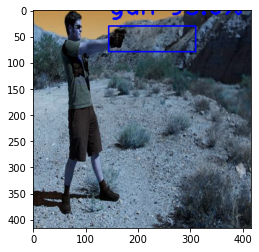

In [51]:
%matplotlib inline 
plt.imshow(img1)
plt.show()

In [73]:
results.pred[0][0][:4].tolist()

[1509.34814453125, 63.761722564697266, 1668.5047607421875, 494.8423767089844]

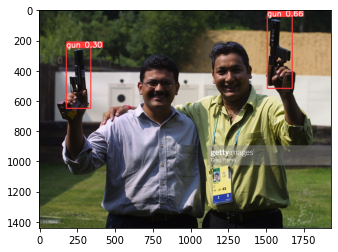

In [38]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [39]:
cap = cv2.VideoCapture('gun.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    
    cv2.imshow('Real time gun detection', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\abwao\appdata\local\programs\python\python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 